## 7.2 - Hierarchical Clustering

### 7.2.1. Hierarchical Clustering Example using Dummy Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Example 1

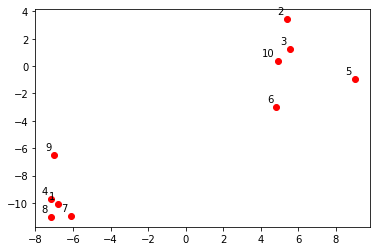

In [2]:
# generating dummy data of 10 records with 2 clusters
features, labels = make_blobs(n_samples=10, centers=2, cluster_std = 2.00)

#plotting the dummy data
plt.scatter(features[:,0], features[:,1], color ='r' )

#adding numbers to data points
annots = range(1, 11)
for label, x, y  in zip(annots, features[:, 0], features[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [3]:
#printing feature coordinates
features

array([[ -6.79687081, -10.05371929],
       [  5.40108592,   3.42880613],
       [  5.55685736,   1.26409966],
       [ -7.18174741,  -9.74079136],
       [  9.01631034,  -0.92461012],
       [  4.82595011,  -2.96634321],
       [ -6.12683683, -10.96498578],
       [ -7.19599197, -11.02563614],
       [ -6.98585555,  -6.50416859],
       [  4.90897822,   0.3653634 ]])

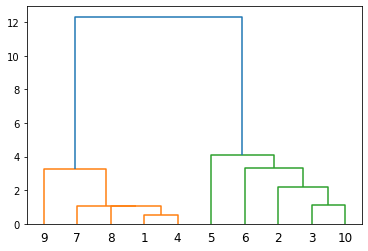

In [4]:
#importing dendrogram and linkage classes from scipy
from scipy.cluster.hierarchy import dendrogram, linkage


#creating an object of linkage class
dendos = linkage(features, 'single')

annots = range(1, 11)

# creating dendrograms
dendrogram(dendos,
            orientation='top',
            labels=annots,
            distance_sort='descending',
            show_leaf_counts=True)

#printing dendrograms
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering

# training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

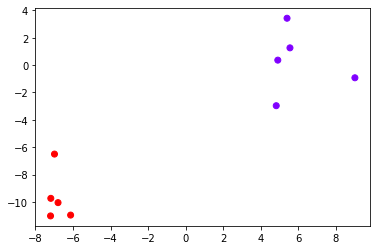

In [6]:
#pring the data points
plt.scatter(features[:,0], features[:,1], c= hc_model.labels_, cmap='rainbow' )

#### Example 1

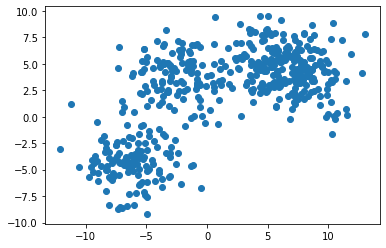

In [7]:
# generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std = 2.00)

#plotting the dummy data
plt.scatter(features[:,0], features[:,1] )

In [8]:
# performing hierarchical clustering using AgglomerativeClustering class
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 3, 3, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 3, 1, 2, 3, 1, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1,
       2, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 0, 0, 3, 3, 2, 3, 2, 0, 2, 2, 3,
       2, 1, 0, 2, 3, 0, 3, 2, 2, 2, 1, 3, 2, 1, 0, 2, 0, 0, 1, 3, 2, 2,
       3, 3, 3, 2, 1, 2, 1, 2, 2, 2, 3, 1, 0, 0, 3, 0, 3, 1, 1, 0, 3, 1,
       3, 0, 0, 3, 1, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 2, 3, 0, 0, 0, 1,
       2, 2, 3, 2, 2, 3, 0, 0, 3, 3, 1, 0, 0, 2, 1, 2, 2, 0, 3, 1, 2, 0,
       1, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 1, 3, 0, 0, 1, 2, 1, 1, 3, 0, 2,
       0, 0, 1, 2, 3, 3, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 3, 0, 3,
       0, 0, 0, 3, 0, 2, 0, 2, 3, 0, 0, 0, 3, 1, 0, 3, 1, 0, 1, 2, 0, 1,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 3, 3, 1,
       3, 0, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 2, 2, 1, 0, 3, 0, 1, 1, 2, 2,
       0, 3, 2, 3, 2, 1, 0, 3, 1, 2, 1, 1, 2, 0, 1, 0, 3, 0, 3, 0, 0, 0,
       1, 2, 1, 1, 2, 3, 0, 3, 1, 2, 1, 1, 3, 1, 1,

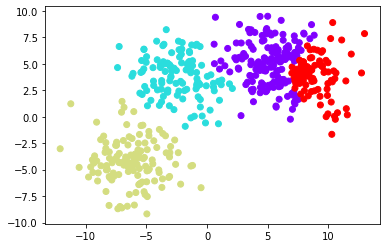

In [9]:
#pring the clustered data points
plt.scatter(features[:,0], features[:,1], c= hc_model.labels_, cmap='rainbow' )

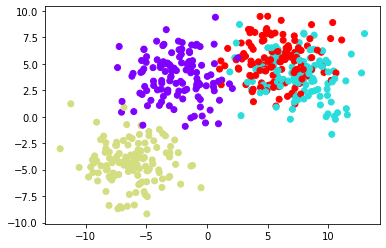

In [10]:
#print actual datapoints
plt.scatter(features[:,0], features[:,1], c= labels, cmap='rainbow' )

### 7.2.2. Clustering of Iris Plants

In [18]:
#importing iris dataset
import seaborn as sns

iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# dividing data into features and labels
features = iris_df.drop(["species"], axis = 1)
labels = iris_df.filter(["species"], axis = 1)
features.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# training Hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering

# training agglomerative clustering model
features = features.values
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

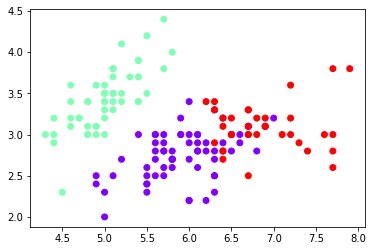

In [14]:
#pring the clustered data points
plt.scatter(features[:,0], features[:,1], c= hc_model.labels_, cmap='rainbow' )


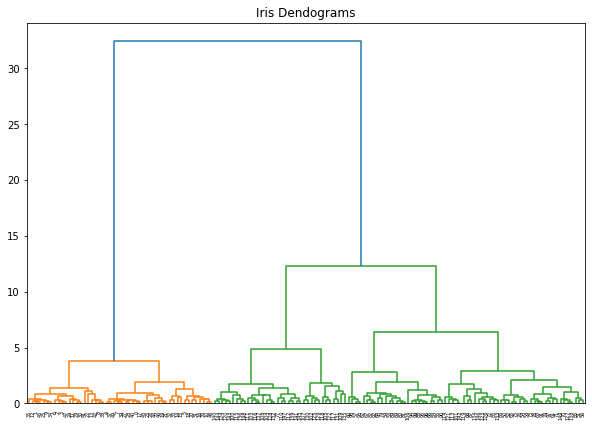

In [15]:
#printing dendrograms
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms")
dend = shc.dendrogram(shc.linkage(features, method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


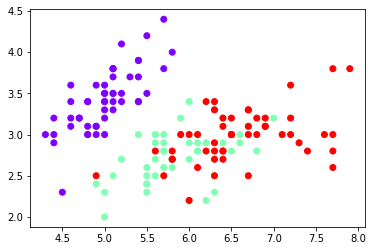

In [16]:
# converting categorical labels to numbers

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

#pring the data points with original labels
plt.scatter(features[:,0], features[:,1], c= labels, cmap='rainbow' )

## Exercise 7.1


#### Question 1

Which of the following is a supervised machine learning algorithm:

A- K Means Clustering \
B- Hierarchical Clustering \
C- All of the above \
D- None of the above

**Answer: D*
    
    
#### Question 2

In KMeans clustering, the inertia tells us?

A- the distance between datapoints withina  cluster\
B- output labels for the datapoints \
C- the number of clusters \
D- None of the above

**Answer: C**


#### Question 3

In hierarchical clustering, in case of vertical dendrograms, the number of clusters is equal the number of \____ lines that the  \____ line passes through?

A- horizontal, vertical \
B- vertical, horizontal \
C- none of the above \
D- All of the above

**Answer: B**

## Exercise 7.2

Apply KMeans clustering on the `banknote.csv` dataset available in the "Resources\Datasets" folder. Find he optimal number of clusters and the print the clustered dataset. 
The following script imports the dataset and prints the first five rows of the dataset. 

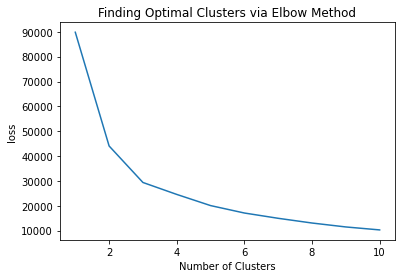

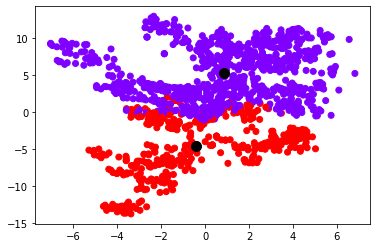

In [17]:
banknote_df = pd.read_csv(r"E:\Hands on Python for Data Science and Machine Learning\Datasets\banknote.csv")
banknote_df.head()

### Solution:

# dividing data into features and labels
features = banknote_df.drop(["class"], axis = 1)
labels = banknote_df.filter(["class"], axis = 1)
features.head()

# training KMeans on K values from 1 to 10
loss =[]
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(features)
    loss.append(km.inertia_)

#printing loss against number of clusters

import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

# training KMeans with 3 clusters
features = features.values
km_model = KMeans(n_clusters=2)
km_model.fit(features)

#pring the data points with prediced labels
plt.scatter(features[:,0], features[:,1], c= km_model.labels_, cmap='rainbow' )

#print the predicted centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')
